## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

### Таблица users

In [65]:
import pandas as pd
df_users = pd.read_csv('/datasets/users.csv')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [66]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [67]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Пустые ячейки только в столбце churn_date, но это нормально, т.к. означает, что тариф еще действует на момент выгрузки.


При необходимости можно перевести столбцы churn_date и reg_date в формат даты

### Таблица calls

In [68]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [69]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [70]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Пустых значений нет.

call_date можно перевести в формат даты.

duration округлить до целых значений и подумать что делать с нулевыми значениями

### Таблица messages (информация о сообщениях)

In [71]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [72]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Пустых значений нет.

message_date можно перевести в формат даты.

### Таблица internet (информация об интернет-сессиях)

In [73]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [74]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [75]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Пустых значений нет.

session_date можно перевести в формат даты.

Unnamed: 0 дублирует индексы, его можно убрать.

### Таблица tariffs (информация о тарифах)

In [76]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [77]:
df_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [78]:
df_tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Пустых значений нет.

## Предобработка данных

### Таблица users

In [79]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [80]:
df_users['reg_date'] = pd.to_datetime(
    df_users['reg_date'], format='%Y-%m-%d'
)
df_users['churn_date'] = pd.to_datetime(
    df_users['churn_date'], format='%Y-%m-%d'
)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Таблица calls

In [81]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [82]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [83]:
df_calls['call_date'] = pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%d'
)

In [84]:
df_calls[df_calls['duration'] == 0]['duration'].count()

39613

Имеем почти 40 тыс. пропущенных звонков с нулевой продолжительностью. Фактически услуга по этим звонкам не оказана, но при расчете она будет влиять на среднюю продолжительность разговора. Уберем эти записи.

In [85]:
df_calls = df_calls.query("duration != 0")

Заведем колонку duration_round где будем хранить округленное количество минут каждого разговора

In [86]:
import numpy as np
df_calls['duration_round'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,call_date,duration,user_id,duration_round
2,1000_2,2018-06-11,2.85,1000,3.0
3,1000_3,2018-09-21,13.80,1000,14.0
4,1000_4,2018-12-15,5.18,1000,6.0
7,1000_7,2018-08-22,18.31,1000,19.0
8,1000_8,2018-09-15,18.44,1000,19.0


Переведем в int столбец duration_round

In [87]:
df_calls['duration_round'] = df_calls['duration_round'].astype(int)

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [88]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls_count = df_calls.groupby(by = ['user_id','month']).agg({'duration':['count','sum'],'duration_round':'sum'})
df_calls_count.reset_index(inplace=True)
df_calls_count.columns = ['user_id','month','calls_count','calls_duration','calls_duration_round']
df_calls_count.head()

,user_id,month,calls_count,calls_duration,calls_duration_round
0,1000,5,17,150.06,159
1,1000,6,28,158.90,172
2,1000,7,41,318.80,340
3,1000,8,42,389.87,408
4,1000,9,46,440.14,466


### Таблица messages

In [89]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [90]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [91]:
df_messages['message_date'] = pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%d'
)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Посчитаем количество отправленных сообщений по месяцам

In [92]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages_count = df_messages.groupby(by = ['user_id','month']).agg({'id':'count'})
df_messages_count.reset_index(inplace=True)
df_messages_count.columns = ['user_id','month','messages_count']
df_messages_count.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Таблица internet

In [93]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [94]:
df_internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [95]:
df_internet = df_internet.drop(columns= 'Unnamed: 0')

In [96]:
df_internet['session_date'] = pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%d'
)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Уберем нулевые показатели МБ и округлим МБ в большую сторону.

In [97]:
df_internet =  df_internet.query('mb_used != 0')
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

Посчитаем объем израсходованного интернет-трафика по месяцам

In [98]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet_count = df_internet.groupby(by = ['user_id','month']).agg({'mb_used':'sum'})
df_internet_count.reset_index(inplace=True)
df_internet_count.columns = ['user_id','month','mb_used']
df_internet_count.head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


Объединим данные по сводным таблицам calls, message, internet.

In [99]:
df_calls_count.head()

,user_id,month,calls_count,calls_duration,calls_duration_round
0,1000,5,17,150.06,159
1,1000,6,28,158.90,172
2,1000,7,41,318.80,340
3,1000,8,42,389.87,408
4,1000,9,46,440.14,466


In [100]:
df_messages_count.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [101]:
df_stat = df_calls_count.merge(df_messages_count, on=['user_id','month'], how='outer')
df_stat = df_stat.merge(df_internet_count, on=['user_id','month'], how='outer')
df_stat

,user_id,month,calls_count,calls_duration,calls_duration_round,messages_count,mb_used
0,1000,5,17.0,150.06,159.0,22.0,2256.0
1,1000,6,28.0,158.90,172.0,60.0,23257.0
2,1000,7,41.0,318.80,340.0,75.0,14016.0
3,1000,8,42.0,389.87,408.0,81.0,14070.0
4,1000,9,46.0,440.14,466.0,57.0,14581.0
...,...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,NaN,21.0,19588.0
3210,1489,11,NaN,NaN,NaN,20.0,17516.0
3211,1489,12,NaN,NaN,NaN,35.0,17341.0
3212,1240,2,NaN,NaN,NaN,NaN,961.0


Добавим в df_stat информацию о наименовании тарифа

In [102]:
df_stat = df_stat.merge(df_users[['user_id','tariff','city']], on=['user_id'], how='left')
df_stat.head()

,user_id,month,calls_count,calls_duration,calls_duration_round,messages_count,mb_used,tariff,city
0,1000,5,17.0,150.06,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,158.90,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,318.80,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,389.87,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,440.14,466.0,57.0,14581.0,ultra,Краснодар


Добавим в df_stat информацию о тарифных условиях

In [103]:
df_stat = df_stat.merge(df_tariffs, left_on='tariff', right_on = 'tariff_name', how='left')
df_stat = df_stat.drop(columns= 'tariff_name')
df_stat.head()

,user_id,month,calls_count,calls_duration,calls_duration_round,messages_count,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,150.06,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,158.90,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,318.80,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,389.87,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,440.14,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [104]:
df_stat.isnull().sum()

user_id                    0
month                      0
calls_count               46
calls_duration            46
calls_duration_round      46
messages_count           497
mb_used                   13
tariff                     0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Заполним пропущенные значения нулями, т.к. наличие пустых значений говорит о том, что клиент не пользовался услугой

In [105]:
df_stat.fillna(0, inplace = True)

In [106]:
import math
def get_revenue (row):
    revenue = row['rub_monthly_fee']
    if row['calls_duration_round'] > row['minutes_included']:
        revenue += (row['calls_duration_round'] - row['minutes_included']) * row['rub_per_minute']
    if row['messages_count'] > row['messages_included']:
        revenue += (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    if row['mb_used']>row['mb_per_month_included']:
        revenue += math.ceil((row['mb_used']-row['mb_per_month_included'])/1024) * row['rub_per_gb']
    return revenue
df_stat['revenue'] = df_stat.apply(get_revenue, axis = 1)
df_stat.head()

,user_id,month,calls_count,calls_duration,calls_duration_round,messages_count,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,17.0,150.06,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,28.0,158.90,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,41.0,318.80,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,42.0,389.87,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,46.0,440.14,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0


## Анализ данных

Посмотрим сколько минут разговора нужно пользователям разных тарифов в месяц

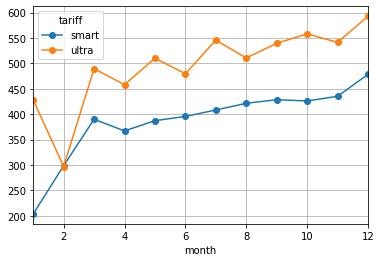

In [107]:
df_stat.pivot_table(index = 'month', values='calls_duration_round', columns = 'tariff').plot( grid = True,style = '-o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b124ab50>]],
      dtype=object)

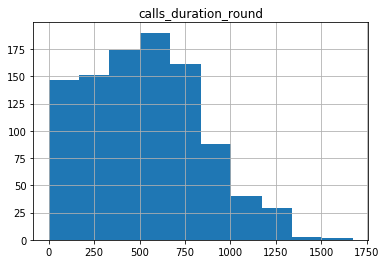

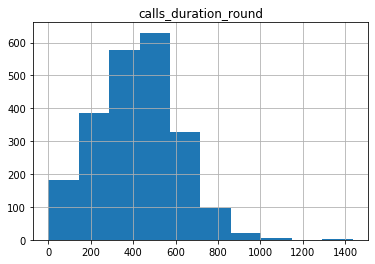

In [108]:
# гистограммы распределения
df_stat[df_stat['tariff'] == "ultra"].hist(column = 'calls_duration_round')
df_stat[df_stat['tariff'] != "ultra"].hist(column = 'calls_duration_round')

In [109]:
# посчитаем среднее значение, дисперсию и стандартное отклонение по calls_duration
ultra_calls_duration_mean = df_stat[df_stat['tariff'] == "ultra"]['calls_duration_round'].mean()
ultra_calls_duration_variance = np.var(df_stat[df_stat['tariff'] == "ultra"]['calls_duration_round'],ddof = 1)
ultra_calls_duration_std = np.sqrt(ultra_calls_duration_variance)

print("Данные по calls_duration_round тариф ultra:")
print("Среднее значение: ", ultra_calls_duration_mean)
print("Дисперсия: ", ultra_calls_duration_variance)
print("Стандартное отклонение: ", ultra_calls_duration_std)
print()

smart_calls_duration_mean = df_stat[df_stat['tariff'] == "smart"]['calls_duration_round'].mean()
smart_calls_duration_variance = np.var(df_stat[df_stat['tariff'] == "smart"]['calls_duration_round'], ddof=1)
smart_calls_duration_std = np.sqrt(smart_calls_duration_variance)

print("Данные по calls_duration_round тариф smart:")
print("Среднее значение: ", smart_calls_duration_mean)
print("Дисперсия: ", smart_calls_duration_variance)
print("Стандартное отклонение: ", smart_calls_duration_std)
print()


Данные по calls_duration_round тариф ultra:
Среднее значение:  526.6233502538071
Дисперсия:  100873.63339730098
Стандартное отклонение:  317.6060978591264

Данные по calls_duration_round тариф smart:
Среднее значение:  417.9349484073576
Дисперсия:  36219.31578434428
Стандартное отклонение:  190.31372988921288



Посмотрим сколько сообщений нужно пользователям разных тарифов в месяц

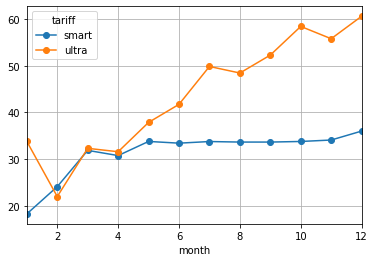

In [110]:
df_stat.pivot_table(index = 'month', values='messages_count', columns = 'tariff').plot( grid = True,style = '-o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b105c6d0>]],
      dtype=object)

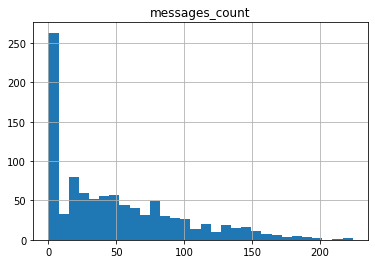

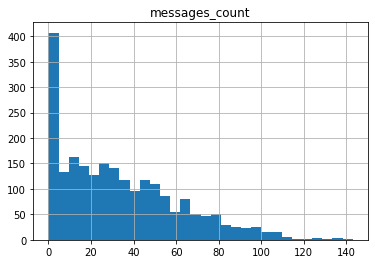

In [111]:
# гистограммы распределения
df_stat[df_stat['tariff'] == "ultra"].hist(column = 'messages_count',bins = 30)
df_stat[df_stat['tariff'] != "ultra"].hist(column = 'messages_count',bins = 30)

In [112]:
# посчитаем среднее значение, дисперсию и стандартное отклонение по messages_count
ultra_messages_count_mean = df_stat[df_stat['tariff'] == "ultra"]['messages_count'].mean()
ultra_messages_count_variance = np.var(df_stat[df_stat['tariff'] == "ultra"]['messages_count'], ddof=1)
ultra_messages_count_std = np.sqrt(ultra_messages_count_variance)

print("Данные по messages_count тариф ultra:")
print("Среднее значение: ", ultra_messages_count_mean)
print("Дисперсия: ", ultra_messages_count_variance)
print("Стандартное отклонение: ", ultra_messages_count_std)
print()

smart_messages_count_mean = df_stat[df_stat['tariff'] == "smart"]['messages_count'].mean()
smart_messages_count_variance = np.var(df_stat[df_stat['tariff'] == "smart"]['messages_count'], ddof=1)
smart_messages_count_std = np.sqrt(smart_messages_count_variance)

print("Данные по messages_count тариф smart:")
print("Среднее значение: ", smart_messages_count_mean)
print("Дисперсия: ", smart_messages_count_variance)
print("Стандартное отклонение: ", smart_messages_count_std)
print()


Данные по messages_count тариф ultra:
Среднее значение:  49.36345177664975
Дисперсия:  2285.2661425446736
Стандартное отклонение:  47.804457350174715

Данные по messages_count тариф smart:
Среднее значение:  33.384028712427096
Дисперсия:  796.8129584480083
Стандартное отклонение:  28.22787555676141



Посмотрим сколько интернет-трафика нужно пользователям разных тарифов в месяц

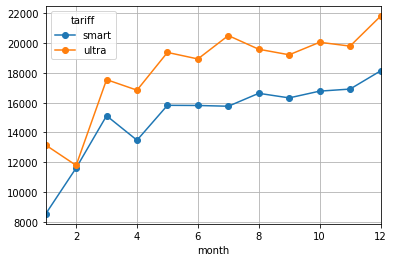

In [113]:
df_stat.pivot_table(index = 'month', values='mb_used', columns = 'tariff').plot( grid = True,style = '-o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b10918d0>]],
      dtype=object)

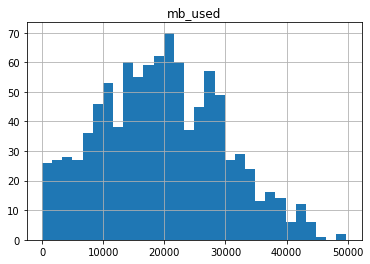

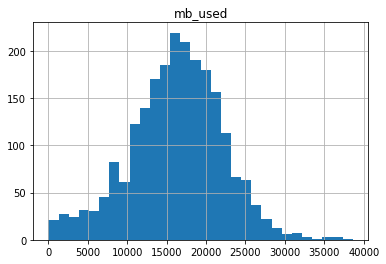

In [114]:
# гистограммы распределения
df_stat[df_stat['tariff'] == "ultra"].hist(column = 'mb_used',bins = 30)
df_stat[df_stat['tariff'] != "ultra"].hist(column = 'mb_used',bins = 30)

In [115]:
# посчитаем среднее значение, дисперсию и стандартное отклонение по mb_used
ultra_mb_used_mean = df_stat[df_stat['tariff'] == "ultra"]['mb_used'].mean()
ultra_mb_used_variance = np.var(df_stat[df_stat['tariff'] == "ultra"]['mb_used'],ddof = 1)
ultra_mb_used_std = np.sqrt(ultra_mb_used_variance)

print("Данные по mb_used тариф ultra:")
print("Среднее значение: ", ultra_mb_used_mean)
print("Дисперсия: ", ultra_mb_used_variance)
print("Стандартное отклонение: ", ultra_mb_used_std)
print()

smart_mb_used_mean = df_stat[df_stat['tariff'] == "smart"]['mb_used'].mean()
smart_mb_used_variance = np.var(df_stat[df_stat['tariff'] == "smart"]['mb_used'],ddof = 1)
smart_mb_used_std = np.sqrt(smart_mb_used_variance)

print("Данные по mb_used тариф smart:")
print("Среднее значение: ", smart_mb_used_mean)
print("Дисперсия: ", smart_mb_used_variance)
print("Стандартное отклонение: ", smart_mb_used_std)

Данные по mb_used тариф ultra:
Среднее значение:  19486.90152284264
Дисперсия:  101935621.04821923
Стандартное отклонение:  10096.317202238608

Данные по mb_used тариф smart:
Среднее значение:  16229.188425302826
Дисперсия:  34545911.12695753
Стандартное отклонение:  5877.576977544193


Проанализируем выручку

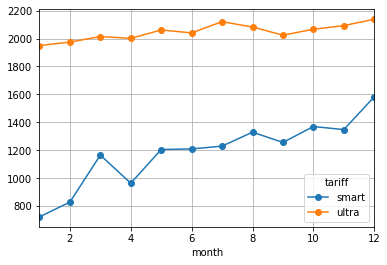

In [116]:
df_stat.pivot_table(index = 'month', values='revenue', columns = 'tariff').plot( grid = True,style = '-o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b0dab0d0>]],
      dtype=object)

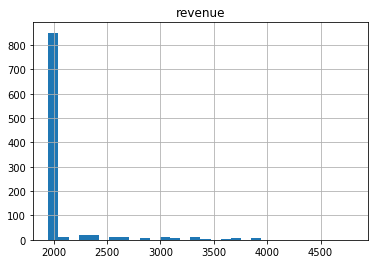

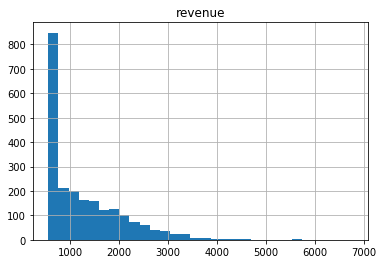

In [117]:
# гистограммы распределения
df_stat[df_stat['tariff'] == "ultra"].hist(column = 'revenue',bins = 30)
df_stat[df_stat['tariff'] != "ultra"].hist(column = 'revenue',bins = 30)

In [118]:
# статистика выручки по тарифу Ультра
df_stat[df_stat['tariff'] == "ultra"]['revenue'].describe()

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

In [119]:
# статистика выручки по тарифу Смарт
df_stat[df_stat['tariff'] == "smart"]['revenue'].describe()

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

In [120]:
df_stat.groupby('tariff')['revenue'].agg(['sum','count', 'mean', 'std','var'])

,sum,count,mean,std,var
tariff,,,,,
smart,2885751.0,2229,1294.63930,820.933202,673931.321363
ultra,2040000.0,985,2071.06599,378.802377,143491.240560


### Вывод

По выручке за год больше набрал тариф Смарт (2,8 млн против 2 млн). Такой результат получен за счет большего кол-ва клиентов (2.2 тыс месячных пакетов услуг за год против 1 тыс.). Средняя выручка от клиента в месяц больше у тарифа Ультра (2 тыс против 1.3 тыс), при этом стандартное отклонение больше у тарифа Смарт. Доход равный стоимости тарифа занимает 1 квартиль у тарифа Смарт и 3 квартиля у тарифа Ультра. Это говорит о том, что пользователи тарифа Смарт чаще и больше уходят за лимит тарифа, чем пользователи Ультра. 

Исходя из всего анализа мы видим, что тариф Смарт выходит за рамки лимитов по всему спектру услуг, именно из-за этого выручка по данному тарифу имеет такой сильный правый скос и даже средняя выручка куда больше абонентки. Если говорить про Ультру, то абоненты данного тарифа укладываются в рамки, по смс\минутам имеют сильный недобор до лимитов, тогда как по интернету небольшой перерасход. Выручка со Смарта как видим куда менее стабильна.

## Проверка гипотез

Сформируем гипотезы: 

Но - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается

Н1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

### Проверяем гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [121]:
df_stat.groupby('tariff')['revenue'].agg(['sum','count', 'mean', 'std','var'])

,sum,count,mean,std,var
tariff,,,,,
smart,2885751.0,2229,1294.63930,820.933202,673931.321363
ultra,2040000.0,985,2071.06599,378.802377,143491.240560


In [122]:
from scipy import stats as st
alpha = 0.05
df_stat_ultra = df_stat[df_stat['tariff'] == "ultra"]
df_stat_smart = df_stat[df_stat['tariff'] == "smart"]

results = st.ttest_ind(df_stat_ultra['revenue'], df_stat_smart['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Нулевая гипотеза о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается отвергнута

### Проверяем гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [123]:
df_stat_ultra_moscow = df_stat_ultra[df_stat_ultra['city'] == "Москва"]
df_stat_ultra_not_moscow = df_stat_ultra[df_stat_ultra['city'] != "Москва"]

In [124]:
alpha = 0.05

results = st.ttest_ind(df_stat_ultra_moscow['revenue'], df_stat_ultra_not_moscow['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8475623384854951
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза о том, что средняя выручка пользователей с тарифом Ультра из Москвы не отличается от выручки пользователей из других регионов отвергнута.

In [125]:
df_stat_smart_moscow = df_stat_smart[df_stat_smart['city'] == "Москва"]
df_stat_smart_not_moscow = df_stat_smart[df_stat_smart['city'] != "Москва"]

In [126]:
alpha = 0.05

results = st.ttest_ind(df_stat_smart_moscow['revenue'], df_stat_smart_not_moscow['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19196326570657848
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу о том, что средняя выручка пользователей с тарифом Смарт из Москвы не отличается от выручки пользователей из других регионов отвергнуть не удалось.

Проанализируем выручку в разрезе городов Москва/не Москва не разделяя данные по тарифам.

Сформируем гипотезы: 

Но - средняя выручка пользователей в Москве и вне Москвы не различается

Н1 - средняя выручка пользователей в Москве и вне Москвы различается

In [127]:
df_stat_moscow = df_stat[df_stat['city'] == "Москва"]
df_stat_not_moscow = df_stat[df_stat['city'] != "Москва"]

In [128]:
alpha = 0.05

results = st.ttest_ind(df_stat_moscow['revenue'], df_stat_not_moscow['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, таким образом гипотеза о том, что средняя выручка в Москве и вне Москвы отличается - отвергнута.

## Общий вывод

Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - **не отвергнута**.

Гипотеза о том, что средняя выручка в Москве и вне Москвы отличается - **отвергнута**.

В части самих тарифов:
Годовая выручка по тарифу Смарт больше, чем по тарифу Ультра. Но это связано только с разностью в количестве клиентов.

Средняя месячная выручка от клиента Ультра больше, чем от клиента Смарт. При этом у Ультра за границы тарифа в месяц выходят менее 25% выборки. Это говорит о том, что значительная часть клиентов оплачивает больше услуг, чем потребляет. Такая ситуация выгодна оператору.

У тарифа смарт больше половины выборки потребляют сверх пакетного лимита. Это говорит о том, что есть потенциальная группа клиентов, которым можно предложить более дорогой тариф.

Для оператора тариф Ультра лучше.